### Tarea: Creación de un Modelo de Clasificación para Predecir Problemas en Procesos de un Servidor

#### Objetivo
Desarrollar un modelo de clasificación que pueda predecir si un proceso en ejecución en un servidor causará problemas, basándose en datos históricos de los procesos. Este modelo ayudará en la detección temprana de procesos potencialmente problemáticos, permitiendo tomar acciones preventivas para asegurar la estabilidad y el rendimiento del servidor.

#### Datos
El conjunto de datos proporcionado incluye las siguientes características para cada proceso en el servidor:

- `ID_Proceso`: Identificador único del proceso.
- `Uso_CPU`: Porcentaje del CPU utilizado por el proceso.
- `Uso_Memoria`: Porcentaje de memoria utilizada por el proceso.
- `Numero_Hilos`: Número de hilos del proceso.
- `Tiempo_Ejecucion`: Tiempo de ejecución del proceso en horas.
- `Numero_Errores`: Número de errores generados por el proceso en las últimas 24 horas.
- `Tipo_Proceso`: Categoría del proceso (Servicio, Aplicación, Sistema).

La variable objetivo, `Estado`, indica si un proceso es problemático (1) o no (0), basada en el uso de recursos, número de errores, tipo de proceso, y otros factores relevantes.

#### Tareas a Realizar

1. **Análisis Exploratorio de Datos (EDA)**: Realice un análisis preliminar para entender la distribución y las características de los datos. Esto incluye verificar valores faltantes, la distribución de las variables numéricas, y la frecuencia de las categorías en variables categóricas.

2. **Preprocesamiento de Datos**:
   - Limpieza: Maneje valores faltantes y elimine duplicados si los hay.
   - Codificación de variables categóricas: Utilice técnicas como One-Hot Encoding para convertir `Tipo_Proceso` en variables numéricas.
   - Escalado de características: Normalice o escale las características numéricas para que tengan el mismo rango de valores, lo cual es importante para algunos modelos de clasificación.

3. **Selección y División del Conjunto de Datos**: Divida el conjunto de datos en entrenamiento, validación y prueba para evaluar la efectividad del modelo.

4. **Construcción y Evaluación de Modelos**:
   - Pruebe diferentes algoritmos de clasificación (por ejemplo, Regresión Logística, Árboles de Decisión, Bosques Aleatorios, y Máquinas de Soporte Vectorial) para encontrar el más adecuado.
   - Utilice validación cruzada para optimizar los hiperparámetros y evaluar la robustez del modelo.
   - Evalúe el modelo final utilizando el conjunto de prueba y métricas adecuadas (precisión, recall, puntuación F1, y curva ROC).

5. **Interpretación de Resultados y Conclusiones**: Interprete los resultados del modelo en el contexto del problema. Identifique las características más importantes que influyen en la predicción de procesos problemáticos y discuta cómo se puede utilizar el modelo en un entorno de producción.

6. **Reporte**: Prepare un informe detallado que cubra todos los pasos realizados, desde el EDA hasta la interpretación de los resultados, incluyendo cualquier insight relevante obtenido durante el proceso.

#### Entrega
La tarea final consistirá en un Jupyter Notebook que contenga todo el código utilizado para el análisis, preprocesamiento de datos, modelado, y evaluación, junto con un reporte escrito (dentro del mismo notebook o como un documento separado) que resuma los hallazgos y las recomendaciones basadas en el modelo desarrollado.

 ##### 1. Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


 ##### 2. Cargar Datos

In [2]:
df = pd.read_csv("Data/datos_procesos.csv",delimiter='|')
df.head(10)


,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Tipo_Proceso,Estado
0,1,37.454012,59.515562,16,8.184879,3,Aplicación,0
1,2,95.071431,36.471714,18,76.195256,8,Aplicación,0
2,3,73.199394,0.537562,21,46.991138,3,Aplicación,0
3,4,59.865848,56.108773,28,87.884325,4,Aplicación,0
4,5,15.601864,89.657041,39,4.622599,1,Sistema,0
5,6,15.599452,53.171690,37,87.672577,5,Aplicación,0
6,7,5.808361,78.048768,1,10.124474,6,Aplicación,0
7,8,86.617615,16.195431,21,85.005518,5,Sistema,0
8,9,60.111501,13.729767,1,65.493696,2,Sistema,0
9,10,70.807258,89.394354,41,4.172866,6,Aplicación,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID_Proceso        1000000 non-null  int64  
 1   Uso_CPU           1000000 non-null  float64
 2   Uso_Memoria       1000000 non-null  float64
 3   Numero_Hilos      1000000 non-null  int64  
 4   Tiempo_Ejecucion  1000000 non-null  float64
 5   Numero_Errores    1000000 non-null  int64  
 6   Tipo_Proceso      1000000 non-null  object 
 7   Estado            1000000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 61.0+ MB


In [4]:
df.dtypes

ID_Proceso            int64
Uso_CPU             float64
Uso_Memoria         float64
Numero_Hilos          int64
Tiempo_Ejecucion    float64
Numero_Errores        int64
Tipo_Proceso         object
Estado                int64
dtype: object

#### 3. Análisis Exploratorio (EDA)

In [5]:
# Verificar valores nulos y duplicados
print(df.isnull().sum())
print(f"Duplicados: {df.duplicated().sum()}")

ID_Proceso          0
Uso_CPU             0
Uso_Memoria         0
Numero_Hilos        0
Tiempo_Ejecucion    0
Numero_Errores      0
Tipo_Proceso        0
Estado              0
dtype: int64
Duplicados: 0


In [6]:
# Estadísticas descriptivas
df.describe()

,ID_Proceso,Uso_CPU,Uso_Memoria,Numero_Hilos,Tiempo_Ejecucion,Numero_Errores,Estado
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,50.033449,49.947866,25.030640,50.043250,5.003483,0.064631
std,288675.278932,28.859113,28.851514,14.150159,28.829111,2.237005,0.245874
min,1.000000,0.000052,0.000038,1.000000,0.100083,0.000000,0.000000
25%,250000.750000,25.034021,24.999623,13.000000,25.074789,3.000000,0.000000
50%,500000.500000,50.055597,49.895350,25.000000,50.040186,5.000000,0.000000
75%,750000.250000,75.009673,74.924148,37.000000,75.030119,6.000000,0.000000
max,1000000.000000,99.999831,99.999938,49.000000,99.999992,19.000000,1.000000


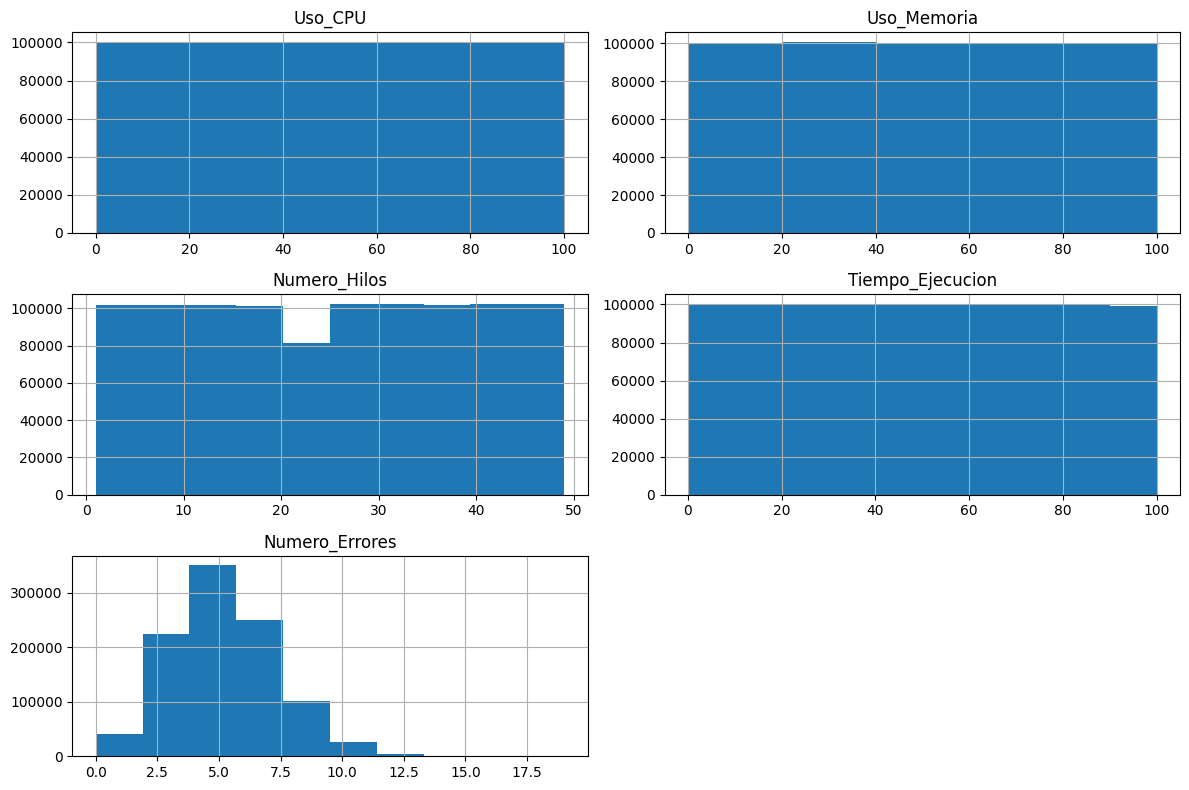

In [7]:
#Distribuciones numéricas
num_cols = ['Uso_CPU', 'Uso_Memoria', 'Numero_Hilos', 'Tiempo_Ejecucion', 'Numero_Errores']
df[num_cols].hist(figsize=(12,8))
plt.tight_layout()
plt.show()


Tipo_Proceso
Servicio      334085
Aplicación    332961
Sistema       332954
Name: count, dtype: int64


<Axes: xlabel='Tipo_Proceso', ylabel='count'>

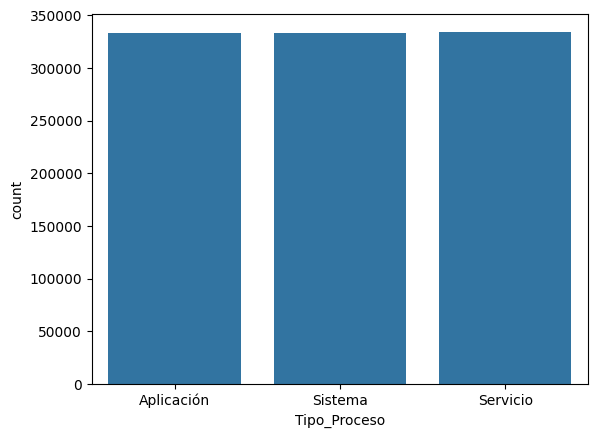

In [8]:
# Frecuencia de categorías

print(df['Tipo_Proceso'].value_counts())
sns.countplot(x='Tipo_Proceso', data=df)


#### 4. Preprocesamiento

In [9]:
# Eliminación de duplicados y manejo de nulos
df = df.drop_duplicates()
df = df.dropna()  # O usar imputación si se requiere


In [10]:
# Separación de variables
X = df.drop(columns=['ID_Proceso', 'Estado'])
y = df['Estado']


In [11]:
# Columnas numéricas y categóricas
numeric_features = ['Uso_CPU', 'Uso_Memoria', 'Numero_Hilos', 'Tiempo_Ejecucion', 'Numero_Errores']
categorical_features = ['Tipo_Proceso']


In [12]:
# Pipeline de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


#### 5. División del dataset

In [13]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


#### 6. Modelado y Evaluación

In [15]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}


In [ ]:
#  Entrenamiento y evaluación
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"\n📌 Modelo: {name}")
    print(classification_report(y_val, y_pred))



📌 Modelo: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    140305
           1       0.74      0.56      0.64      9695

    accuracy                           0.96    150000
   macro avg       0.85      0.77      0.81    150000
weighted avg       0.95      0.96      0.96    150000


📌 Modelo: Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    140305
           1       0.51      0.53      0.52      9695

    accuracy                           0.94    150000
   macro avg       0.74      0.75      0.74    150000
weighted avg       0.94      0.94      0.94    150000


📌 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    140305
           1       0.72      0.54      0.62      9695

    accuracy                           0.96    150000
   macro avg       0.84      0.76      0.80    

#### 7. Curva ROC

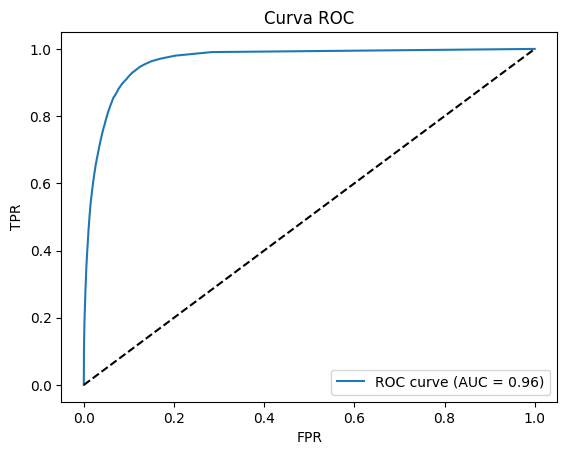

In [14]:
best_model = RandomForestClassifier()
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_model)])
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


#### 8. Importancia de variables

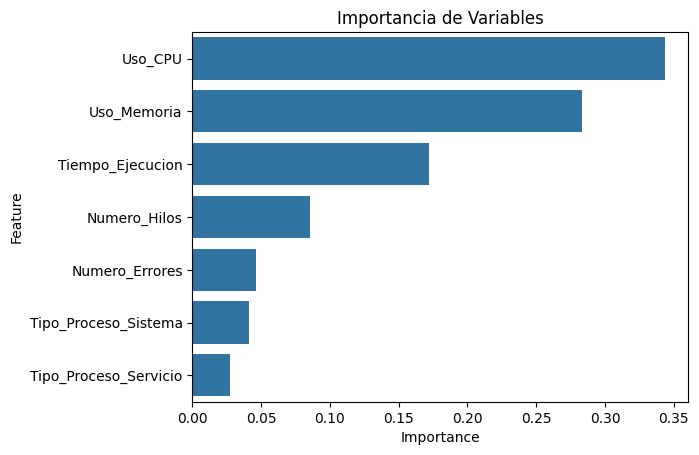

In [15]:
final_model = clf.named_steps['classifier']
importances = final_model.feature_importances_

# Obtener nombres de las columnas tras el preprocesamiento
feature_names = preprocessor.transformers_[0][2] + list(clf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out())

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title("Importancia de Variables")
plt.show()


In [16]:
import joblib

# Guarda el pipeline completo
joblib.dump(clf, "modelo_procesos_servidor.pkl")


['modelo_procesos_servidor.pkl']